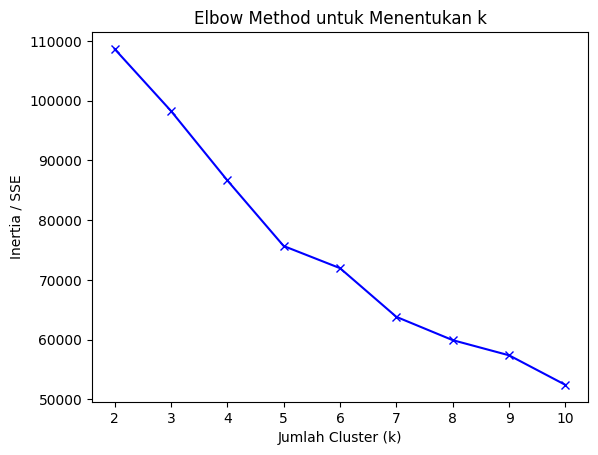

KMeans:
Silhouette: 0.3337, Calinski-Harabasz: 2194.5782, Davies-Bouldin: 1.2655

DBSCAN:
Silhouette: 0.2341, Calinski-Harabasz: 346.6839, Davies-Bouldin: 1.0814

Dunn Index (KMeans): 0.0171
Dunn Index (DBSCAN): 0.2471


,Metode,Silhouette,Calinski-Harabasz,Davies-Bouldin,Dunn Index
0,KMeans,0.333652,2194.578237,1.265539,0.017104
1,DBSCAN,0.234147,346.683937,1.081383,0.247089


In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

# Load Dataset dari GitHub
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv"
df = pd.read_csv(url)
df.head()

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Elbow method
sse = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia / SSE')
plt.title('Elbow Method untuk Menentukan k')
plt.show()

# Asumsikan hasil elbow optimal di k = 3 (ubah jika berbeda)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hitung metrik evaluasi
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"KMeans:\nSilhouette: {silhouette_kmeans:.4f}, Calinski-Harabasz: {ch_kmeans:.4f}, Davies-Bouldin: {db_kmeans:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filter noise
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    ch_dbscan = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
    db_dbscan = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
else:
    silhouette_dbscan = ch_dbscan = db_dbscan = None

print(f"\nDBSCAN:\nSilhouette: {silhouette_dbscan:.4f}, Calinski-Harabasz: {ch_dbscan:.4f}, Davies-Bouldin: {db_dbscan:.4f}")

# Fungsi untuk Dunn Index
from scipy.spatial.distance import euclidean
from itertools import combinations

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) < 2:
        return np.nan

    # Jarak antar cluster minimum
    inter_cluster = []
    for i, j in combinations(unique_clusters, 2):
        cluster_i = X[labels == i]
        cluster_j = X[labels == j]
        distances = [euclidean(p1, p2) for p1 in cluster_i for p2 in cluster_j]
        inter_cluster.append(min(distances))

    # Diameter cluster maksimum
    intra_cluster = []
    for k in unique_clusters:
        cluster_k = X[labels == k]
        if len(cluster_k) > 1:
            distances = [euclidean(p1, p2) for p1, p2 in combinations(cluster_k, 2)]
            intra_cluster.append(max(distances))
        else:
            intra_cluster.append(0)

    return min(inter_cluster) / max(intra_cluster)

# Dunn Index KMeans
dunn_kmeans = dunn_index(X_scaled, kmeans_labels)
print(f"\nDunn Index (KMeans): {dunn_kmeans:.4f}")

# Dunn Index DBSCAN
if len(set(dbscan_labels)) > 1:
    dunn_dbscan = dunn_index(X_scaled[mask], dbscan_labels[mask])
    print(f"Dunn Index (DBSCAN): {dunn_dbscan:.4f}")

import pandas as pd

data = {
    "Metode": ["KMeans", "DBSCAN"],
    "Silhouette": [silhouette_kmeans, silhouette_dbscan],
    "Calinski-Harabasz": [ch_kmeans, ch_dbscan],
    "Davies-Bouldin": [db_kmeans, db_dbscan],
    "Dunn Index": [dunn_kmeans, dunn_dbscan],
}

df_metrics = pd.DataFrame(data)
df_metrics

##Import dan Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv"
df = pd.read_csv(url)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


##Normalisasi Data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

##Metode Elbow

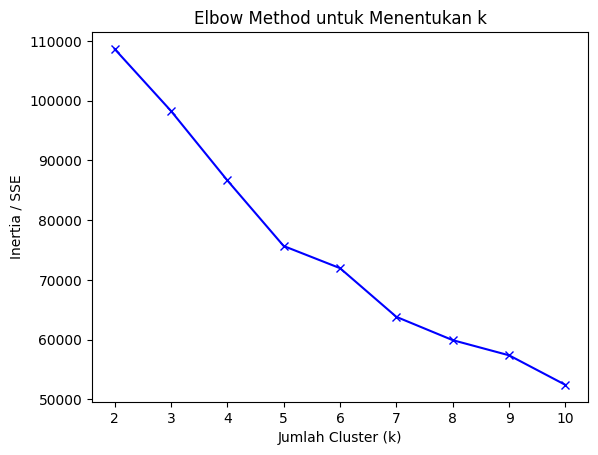

KMeans:
Silhouette: 0.3337, Calinski-Harabasz: 2194.5782, Davies-Bouldin: 1.2655


In [5]:
sse = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia / SSE')
plt.title('Elbow Method untuk Menentukan k')
plt.show()

# Asumsikan hasil elbow optimal di k = 3 (ubah jika berbeda)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hitung metrik evaluasi
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"KMeans:\nSilhouette: {silhouette_kmeans:.4f}, Calinski-Harabasz: {ch_kmeans:.4f}, Davies-Bouldin: {db_kmeans:.4f}")

##DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

##Filter Noise

In [7]:
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    ch_dbscan = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
    db_dbscan = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
else:
    silhouette_dbscan = ch_dbscan = db_dbscan = None

print(f"\nDBSCAN:\nSilhouette: {silhouette_dbscan:.4f}, Calinski-Harabasz: {ch_dbscan:.4f}, Davies-Bouldin: {db_dbscan:.4f}")


DBSCAN:
Silhouette: 0.2341, Calinski-Harabasz: 346.6839, Davies-Bouldin: 1.0814


##Fungsi untuk Dunn Index

In [8]:
from scipy.spatial.distance import euclidean
from itertools import combinations

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) < 2:
        return np.nan

    # Jarak antar cluster minimum
    inter_cluster = []
    for i, j in combinations(unique_clusters, 2):
        cluster_i = X[labels == i]
        cluster_j = X[labels == j]
        distances = [euclidean(p1, p2) for p1 in cluster_i for p2 in cluster_j]
        inter_cluster.append(min(distances))

    # Diameter cluster maksimum
    intra_cluster = []
    for k in unique_clusters:
        cluster_k = X[labels == k]
        if len(cluster_k) > 1:
            distances = [euclidean(p1, p2) for p1, p2 in combinations(cluster_k, 2)]
            intra_cluster.append(max(distances))
        else:
            intra_cluster.append(0)

    return min(inter_cluster) / max(intra_cluster)

##Dunn Index KMeans dan DBSCAN

In [9]:
#KMeans
dunn_kmeans = dunn_index(X_scaled, kmeans_labels)
print(f"\nDunn Index (KMeans): {dunn_kmeans:.4f}")

#DBSCAN
if len(set(dbscan_labels)) > 1:
    dunn_dbscan = dunn_index(X_scaled[mask], dbscan_labels[mask])
    print(f"Dunn Index (DBSCAN): {dunn_dbscan:.4f}")

import pandas as pd

data = {
    "Metode": ["KMeans", "DBSCAN"],
    "Silhouette": [silhouette_kmeans, silhouette_dbscan],
    "Calinski-Harabasz": [ch_kmeans, ch_dbscan],
    "Davies-Bouldin": [db_kmeans, db_dbscan],
    "Dunn Index": [dunn_kmeans, dunn_dbscan],
}

df_metrics = pd.DataFrame(data)
df_metrics


Dunn Index (KMeans): 0.0171
Dunn Index (DBSCAN): 0.2471


,Metode,Silhouette,Calinski-Harabasz,Davies-Bouldin,Dunn Index
0,KMeans,0.333652,2194.578237,1.265539,0.017104
1,DBSCAN,0.234147,346.683937,1.081383,0.247089


## Penjelasan Matematis

### 1. Within-Cluster Sum of Squares (WCSS) – Metode *Elbow*

**WCSS** mengukur seberapa padat *cluster* yang terbentuk dengan menjumlahkan kuadrat jarak setiap titik data ke *centroid* (titik tengah) *cluster*-nya.

$$WCSS = \sum_{i=1}^{k} \sum_{x_j \in C_i} \|x_j - \mu_i\|^2$$

Di mana:
* $C_i$: *Cluster* ke-$i$.
* $\mu_i$: *Centroid* dari *cluster* ke-$i$.

Secara umum, nilai WCSS akan menurun saat jumlah *cluster* ($k$) bertambah. **Metode *Elbow*** memanfaatkan fenomena ini: kita mencari "siku" atau titik belok pada grafik WCSS terhadap jumlah *cluster*. Titik inilah yang sering dianggap sebagai jumlah *cluster* optimal, karena setelah titik itu, penurunan WCSS tidak lagi signifikan.

### 2. Silhouette Score

**Silhouette Score** membantu kita menilai seberapa baik setiap titik data cocok dengan *cluster*-nya sendiri dan seberapa jauh ia dari *cluster* lain. Skor ini berkisar antara -1 hingga 1.

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Di mana:
* $a(i)$: Rata-rata jarak titik $i$ ke semua titik lain dalam *cluster* yang sama. Ini mengukur seberapa "cocok" titik tersebut dengan *cluster*-nya.
* $b(i)$: Rata-rata jarak titik $i$ ke semua titik di *cluster* terdekat yang berbeda. Ini mengukur seberapa "tidak cocok" titik tersebut dengan *cluster* tetangga.

Semakin tinggi nilainya (mendekati 1), menunjukkan *clustering* yang lebih baik, di mana titik-titik data padat di dalam *cluster*-nya dan terpisah jauh dari *cluster* lain.


### 3. Calinski-Harabasz Index

**Calinski-Harabasz Index** adalah metrik yang mengukur rasio antara seberapa jauh *cluster* satu sama lain (*between-cluster dispersion*) dengan seberapa padat titik-titik di dalam setiap *cluster* (*within-cluster dispersion*).

$$CH = \frac{\text{between-cluster dispersion}}{\text{within-cluster dispersion}} \cdot \frac{n - k}{k - 1}$$

Di mana:
* $n$: Jumlah total titik data.
* $k$: Jumlah *cluster*.

Nilai CH yang lebih tinggi menunjukkan *cluster* yang lebih terpisah dan lebih padat secara internal.



### 4. Davies-Bouldin Index

**Davies-Bouldin Index** mengevaluasi kualitas *clustering* dengan mengukur seberapa mirip setiap *cluster* dengan *cluster* yang paling dekat dengannya.

$$DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{\sigma_i + \sigma_j}{d_{ij}} \right)$$

Di mana:
* $\sigma_i$: Rata-rata jarak antara titik dalam *cluster* $i$ ke *centroid*-nya. Ini merepresentasikan "ukuran" atau dispersi *cluster* $i$.
* $d_{ij}$: Jarak antara *centroid* *cluster* $i$ dan *centroid* *cluster* $j$.

Semakin kecil nilai Davies-Bouldin Index, semakin baik *clustering*-nya. Ini berarti *cluster* memiliki dispersi internal yang rendah (kompak) dan terpisah jauh satu sama lain.



### 5. Dunn Index

**Dunn Index** mengukur rasio antara jarak minimum antar *cluster* dengan diameter maksimum *cluster*.

$$\text{Dunn Index} = \frac{\min_{i \ne j} \; d(C_i, C_j)}{\max_k \; \delta(C_k)}$$

Di mana:
* $d(C_i, C_j)$: Jarak minimum antara dua titik yang berada di *cluster* yang berbeda ($C_i$ dan $C_j$).
* $\delta(C_k)$: Diameter maksimum dari *cluster* $C_k$, yaitu jarak terbesar antara dua titik di dalam *cluster* tersebut.

Nilai Dunn Index yang lebih tinggi menunjukkan *clustering* yang lebih baik. Idealnya, kita ingin *cluster* terpisah jauh satu sama lain (jarak antar *cluster* besar) dan setiap *cluster* itu sendiri kompak (diameter *cluster* kecil).